# INTRODUÇÃO TÉCNICA A INTELIGÊNCIA ARTIFICIAL B!

-----------------------

## Métricas de Desempenho


### Exercício Classificação Multi-Classe


Este exercício consiste na avaliação dos resultados de um problema de **Classificação Multi Classe**. Utilizando todas as métricas de desempenho apresentadas.

 * Métricas de Erro
     * Matriz de Confusão
     * Acurácia
     * Precisão
     * Recall
     * F1-Score
 * Custo Computacional
 * Convergência  
 
 
*Obs*: *Podem ser utilizadas as funções de avaliação próprias do sklearn como por exemplo
**plot_confusion_matrix**, **accuracy_scores**, **precision_recall_fscore_support** visto que o objetivo do exercício é mais focado na análise em si do que no desenvolvimento das métricas.*
 
-----------------------
 
 **Problema** : 
 
Utilizaremos o dataset de Multi-Classes [Iris](https://archive.ics.uci.edu/ml/datasets/iris). 


É um dos datasets mais utilizados em problemas de classificação multi-casse.
 
 
A partir dos valores de comprimento e largura da sépala e pétalas de cada planta Iris, podemos classifica-la entre 3 variedades diferentes:

* Setosa
* Versicolore 
* Virginica
 
 
 
 > Mais infos sobre o dataset pode ser encontrado [aqui](http://rexa.info/paper/2fb499aa4d6a7071a6ba53c679ccca7055813114)
-----------------------


In [103]:
# Carregar Pacotes

import io
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados

In [104]:
df = pd.read_csv("iris.csv", header=0)
df.head()
print(df)

     150    4  setosa  versicolor  virginica
0    5.1  3.5     1.4         0.2          0
1    4.9  3.0     1.4         0.2          0
2    4.7  3.2     1.3         0.2          0
3    4.6  3.1     1.5         0.2          0
4    5.0  3.6     1.4         0.2          0
..   ...  ...     ...         ...        ...
145  6.7  3.0     5.2         2.3          2
146  6.3  2.5     5.0         1.9          2
147  6.5  3.0     5.2         2.0          2
148  6.2  3.4     5.4         2.3          2
149  5.9  3.0     5.1         1.8          2

[150 rows x 5 columns]


In [105]:
x= df.iloc[:,:-1] #variavel independente 
y= df.iloc[:, -1] # variavel dependente 

In [106]:
labels=["Setosa", "Versicolor", "Virginica"]
print("Tamanho do Dataset Completo {} amostras".format(len(x)))
print("{} {} amostras, {} {} amostras, {} {} amostras".format(
        labels[0], y.value_counts()[0],
        labels[1], y.value_counts()[1],
        labels[2], y.value_counts()[2]))

#dividindo o dataset em dados de treino e de prod
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=9, shuffle=True)

Tamanho do Dataset Completo 150 amostras
Setosa 50 amostras, Versicolor 50 amostras, Virginica 50 amostras


# Treinando os dados já separados 

In [135]:
from random import randint, random
from sklearn import svm

random_state = randint(0,20)
print(random_state)
model = svm.LinearSVC(max_iter=10000, random_state=random_state)
model.fit(x_train, y_train)


5


LinearSVC(max_iter=10000, random_state=5)

In [136]:
y_pred = model.predict(x_test)
y_pred

array([2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       2], dtype=int64)

## Matriz de Confusão


0


Text(33.0, 0.5, 'Valor Real')

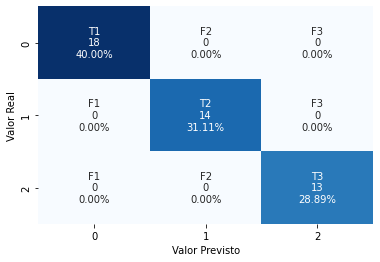

In [140]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

T1 = cm[0,0]
T2 = cm[1,1]
T3 = cm[2,2]
F1 = cm[1,0] + cm[2,0]
F2 = cm[0,1] + cm[2,1]
F3 = cm[0,2] + cm[1,2]
T1,F2,F3,F1,T2,F3,F1,F2,T3 = cm.ravel()
print(F2)

group_names = ['T1','F2','F3','F1','T2','F3','F1','F2','T3']

group_counts = [ '{0:0.0f}'.format(value) for value in cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cm,annot=labels, fmt='', cmap="Blues",cbar=False)
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")


# Acurácia

In [138]:
acuracia = (T1+ T2 + T3)/ cm.sum()
print(f"Acurácia de {acuracia*100:0.2f}%")

Acurácia de 100.00%


# Precisão

In [139]:
precisao = (T1+ T2 + T3)/ 